## Analyzing Stress Levels in Sleep Using Machine Learning

In this project, I use a dataset from [Kaggle.com](https://www.kaggle.com/datasets/laavanya/human-stress-detection-in-and-through-sleep) to classify the stress levels of people based on the data gathered by the Smart-Yoga Pillow (SaYoPillow) [1] [2].

I do not own this dataset and the data was not gathered by me. I have listed the citations in the References section of this notebook as specified by the person who posted the dataset on Kaggle.



---



## Understanding the Dataset


In [ ]:
from google.colab import files

uploaded = files.upload()

Saving SaYoPillow.csv to SaYoPillow (1).csv


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("SaYoPillow.csv")
df

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.800,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.640,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.000,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.760,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.120,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0
...,...,...,...,...,...,...,...,...,...
625,69.600,20.960,92.960,10.960,90.960,89.80,3.440,62.40,2
626,48.440,17.376,98.064,6.752,96.376,73.76,8.376,53.44,0
627,97.504,27.504,86.880,17.752,84.256,101.88,0.000,78.76,4
628,58.640,19.728,95.728,9.728,94.592,84.32,6.728,59.32,1


As specified by the author of the data, the following columns exist in the datset:

sr: Snoring Rate of the User,

rr: Respiration Rate,

t: Body Temperature,

lm: Limb Movement Rate,

bo: Blood Oxygen Levels,

rem: Eye Movement,

sr.1: Number of Hours of Sleep,

hr: Heart Rate

sl: Stress Levels: 0 = Low/Normal, 1 = Medium Low, 2 = Medium, 3 = Medium High, 4 = High



To make this a little bit easier and clearer, I will change the column names to what they actually represent.

In [ ]:
df.rename(columns={'sr': 'Snoring_Rate', 'rr': 'Respiration_Rate', 't': 'Body_Temperature', 'lm': 'Limb_Movement_Rate',
                   'bo': 'Blood_Oxygen_Levels', 'rem': 'Eye_Movement', 'sr.1': 'Number_of_Hours_of_Sleep', 'hr': 'Heart_Rate', 'sl': 'Stress_Levels'}, inplace=True)


In [ ]:
df

,Snoring_Rate,Respiration_Rate,Body_Temperature,Limb_Movement_Rate,Blood_Oxygen_Levels,Eye_Movement,Number_of_Hours_of_Sleep,Heart_Rate,Stress_Levels
0,93.800,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.640,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.000,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.760,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.120,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0
...,...,...,...,...,...,...,...,...,...
625,69.600,20.960,92.960,10.960,90.960,89.80,3.440,62.40,2
626,48.440,17.376,98.064,6.752,96.376,73.76,8.376,53.44,0
627,97.504,27.504,86.880,17.752,84.256,101.88,0.000,78.76,4
628,58.640,19.728,95.728,9.728,94.592,84.32,6.728,59.32,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Snoring_Rate              630 non-null    float64
 1   Respiration_Rate          630 non-null    float64
 2   Body_Temperature          630 non-null    float64
 3   Limb_Movement_Rate        630 non-null    float64
 4   Blood_Oxygen_Levels       630 non-null    float64
 5   Eye_Movement              630 non-null    float64
 6   Number_of_Hours_of_Sleep  630 non-null    float64
 7   Heart_Rate                630 non-null    float64
 8   Stress_Levels             630 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 44.4 KB


In [ ]:
df.shape

(630, 9)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df['Stress_Levels'].value_counts()

3    126
1    126
0    126
2    126
4    126
Name: Stress_Levels, dtype: int64

In [ ]:
df.corr()

,Snoring_Rate,Respiration_Rate,Body_Temperature,Limb_Movement_Rate,Blood_Oxygen_Levels,Eye_Movement,Number_of_Hours_of_Sleep,Heart_Rate,Stress_Levels
Snoring_Rate,1.000000,0.976268,-0.902475,0.981078,-0.903140,0.950600,-0.920554,0.976268,0.975322
Respiration_Rate,0.976268,1.000000,-0.889237,0.991738,-0.889210,0.935572,-0.891855,1.000000,0.963516
Body_Temperature,-0.902475,-0.889237,1.000000,-0.896412,0.998108,-0.857299,0.954860,-0.889237,-0.962354
Limb_Movement_Rate,0.981078,0.991738,-0.896412,1.000000,-0.898527,0.964703,-0.901102,0.991738,0.971071
Blood_Oxygen_Levels,-0.903140,-0.889210,0.998108,-0.898527,1.000000,-0.862136,0.950189,-0.889210,-0.961092
Eye_Movement,0.950600,0.935572,-0.857299,0.964703,-0.862136,1.000000,-0.893952,0.935572,0.951988
Number_of_Hours_of_Sleep,-0.920554,-0.891855,0.954860,-0.901102,0.950189,-0.893952,1.000000,-0.891855,-0.973036
Heart_Rate,0.976268,1.000000,-0.889237,0.991738,-0.889210,0.935572,-0.891855,1.000000,0.963516
Stress_Levels,0.975322,0.963516,-0.962354,0.971071,-0.961092,0.951988,-0.973036,0.963516,1.000000



Some initial observations:



1.   The data contains float values for all columns except for the 'Stress_Levels' column, which contains integers.
2.   The data (initially) contains 630 rows and 9 columns.
3.   The data contains no duplicates.
4.   We have equal cases of each "Stress_Level" class. This should help avoid bias towards a particular class.
5. There is a linear relationship between Stress_Levels and all other columns.





---



## Data Preprocessing

It is necessary to clear any NaN (null) values.

In [ ]:
df.dropna(inplace=True)

In [ ]:
df

,Snoring_Rate,Respiration_Rate,Body_Temperature,Limb_Movement_Rate,Blood_Oxygen_Levels,Eye_Movement,Number_of_Hours_of_Sleep,Heart_Rate,Stress_Levels
0,93.800,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.640,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.000,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.760,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.120,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0
...,...,...,...,...,...,...,...,...,...
625,69.600,20.960,92.960,10.960,90.960,89.80,3.440,62.40,2
626,48.440,17.376,98.064,6.752,96.376,73.76,8.376,53.44,0
627,97.504,27.504,86.880,17.752,84.256,101.88,0.000,78.76,4
628,58.640,19.728,95.728,9.728,94.592,84.32,6.728,59.32,1


No rows were lost, so that means that there are no NaN values.

Convert "Body_Temperature" values to Celcius for ease of analysis.

In [ ]:
def fahrenheit_to_celsius(fahrenheit):
    return (fahrenheit - 32) * 5 / 9

df['Body_Temperature'] = df['Body_Temperature'].apply(fahrenheit_to_celsius)

In [ ]:
df

,Snoring_Rate,Respiration_Rate,Body_Temperature,Limb_Movement_Rate,Blood_Oxygen_Levels,Eye_Movement,Number_of_Hours_of_Sleep,Heart_Rate,Stress_Levels
0,93.800,25.680,33.244444,16.600,89.840,99.60,1.840,74.20,3
1,91.640,25.104,33.084444,15.880,89.552,98.88,1.552,72.76,3
2,60.000,20.000,35.555556,10.000,95.000,85.00,7.000,60.00,1
3,85.760,23.536,32.648889,13.920,88.768,96.92,0.768,68.84,3
4,48.120,17.248,36.595556,6.496,96.248,72.48,8.248,53.12,0
...,...,...,...,...,...,...,...,...,...
625,69.600,20.960,33.866667,10.960,90.960,89.80,3.440,62.40,2
626,48.440,17.376,36.702222,6.752,96.376,73.76,8.376,53.44,0
627,97.504,27.504,30.488889,17.752,84.256,101.88,0.000,78.76,4
628,58.640,19.728,35.404444,9.728,94.592,84.32,6.728,59.32,1




---



## Data Analysis

It is important to analyse the data in order to find patterns, trends, relationships and meaning from it to provide a deeper understanding and also fuel informed decision-making.

Since the "Stress_Levels" column had a strong correlation with all other columns, I will try to visualize this in order to extract any important information.

Graph of Stress Levels vs Body Temperature:

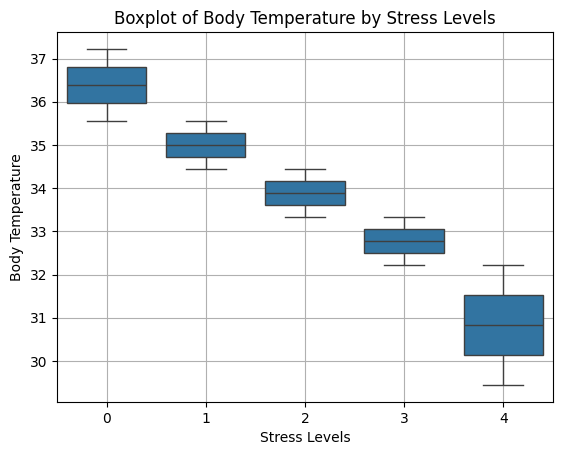

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x='Stress_Levels', y='Body_Temperature', data=df)
plt.title('Boxplot of Body Temperature by Stress Levels')
plt.xlabel('Stress Levels')
plt.ylabel('Body Temperature')
plt.grid(True)
plt.show()

We can see from this graph that people with lower Body Temperature ranges had increased Stress Levels.

People with the average body temperature of 37 °C usually had a stress level of 0.




Graph of Stress Levels vs Heart Rate:

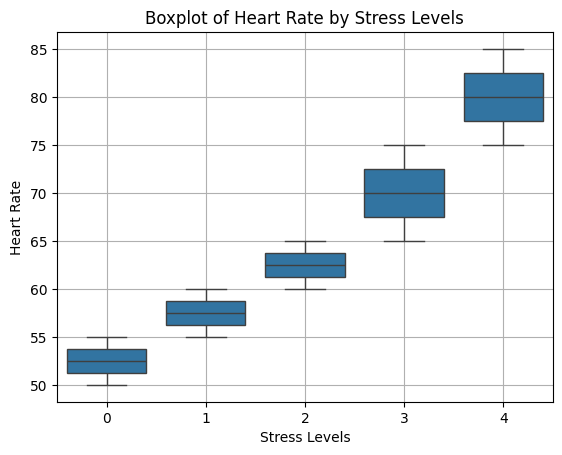

In [ ]:
sns.boxplot(x='Stress_Levels', y='Heart_Rate', data=df)
plt.title('Boxplot of Heart Rate by Stress Levels')
plt.xlabel('Stress Levels')
plt.ylabel('Heart Rate')
plt.grid(True)
plt.show()

Just like Body Temperature, Heart Rate ranges differ based on the Stress Levels.We can see from this graph that people with higher Heart Rate ranges had increased Stress Levels.

These linear relationships of these columns with the 'Stress_Levels' column are alluded to in the correlation matrix. The previous two graphs proved that these columns are in fact correlated with Stress Levels. It is safe to assume that this is the case with the rest of the columns, as well.

## Model Creation

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Since the independant variables are highly correlated with each other, I will choose only two to avoid multicolinearity. I will choose 'Snoring_Rate' and 'Heart_Rate' as they have the highest correlation values with the 'Stress_Levels' column.

In [ ]:
# Assign independent and dependent variables
x = df[['Snoring_Rate', 'Heart_Rate']]
y = df['Stress_Levels']

In [ ]:
# Normalize independent variables
scale = StandardScaler()

normalized_x_data = scale.fit_transform(x)

In [ ]:
# Split into train and test data
x_train, x_test, y_train, y_test = train_test_split(normalized_x_data, y, test_size=0.25, random_state=23)

In [ ]:
# Train model
model = LogisticRegressionCV()
model.fit(x_train, y_train)

In [ ]:
# Predict random point
model.predict([[66.232, 60.00]])

array([4])

# Model Evaluation

In order to properly evaluate the model, I will use various techniques, including a confusion matrix, accuracy score, precision score, recall score, and F-score.

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
from sklearn import metrics

In [ ]:
actual_values = y_test
predicted_values = model.predict(x_test)

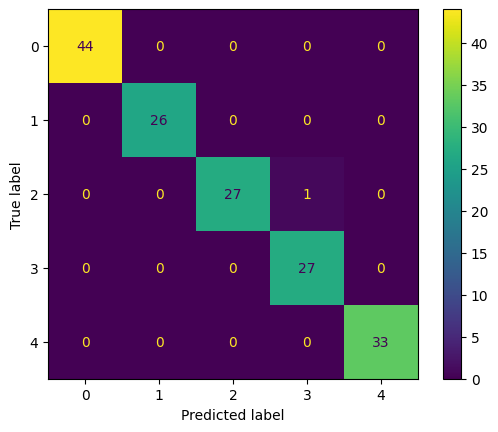

In [ ]:
confusion_matrix = metrics.confusion_matrix(actual_values, predicted_values)
cm_display = ConfusionMatrixDisplay(confusion_matrix, display_labels=[0,1,2,3,4])
cm_display.plot()
plt.show()

In [ ]:
accuracy_score(actual_values, predicted_values)

0.9936708860759493

In [ ]:
precision_score(actual_values, predicted_values, average='macro')

0.9928571428571429

In [ ]:
recall_score(actual_values, predicted_values, average='macro')

0.9928571428571429

In [ ]:
f1_score(actual_values, predicted_values, average='macro')

0.9927272727272728

The multicolinearity factor of the dataset is most likely the reason for such high and unrealistic results. However, taking one independent variable to be the only feature would also not correctly reflect the relationships found in the data.

## References

1. L. Rachakonda, A. K. Bapatla, S. P. Mohanty, and E. Kougianos, “SaYoPillow: Blockchain-Integrated Privacy-Assured IoMT Framework for Stress Management Considering Sleeping Habits”, IEEE Transactions on Consumer Electronics (TCE), Vol. 67, No. 1, Feb 2021, pp. 20-29.
2. L. Rachakonda, S. P. Mohanty, E. Kougianos, K. Karunakaran, and M. Ganapathiraju, “Smart-Pillow: An IoT based Device for Stress Detection Considering Sleeping Habits”, in Proceedings of the 4th IEEE International Symposium on Smart Electronic Systems (iSES), 2018, pp. 161--166.